# Comparison between the genders for the ages (after controlling for type)

Questions

- What are the differences between the genders for the ages?
- Do we observe the same changes as globally?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Interactions between genders and ages (after controlling type)
M_F_8w = results(dge,contrast= c(0,1,0,0,0,0,0,1/2,0,0), alpha=0.05, test="Wald")
M_F_52w = results(dge,contrast= c(0,1,0,0,0,0,1,1/2,0,0), alpha=0.05, test="Wald")
M_F_104w = results(dge,contrast= c(0,1,0,0,0,1,0,1/2,0,0), alpha=0.05, test="Wald")

In [7]:
w8_samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2',
    'SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2')
w52_samples = c(    
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2',
    'SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2')
w104_samples = c(      
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2',
    'SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')
annot = as.data.frame(colData(dge)[, c("gender","type")])
to_comp = c("M VS F (8w)", "M VS F (52w)", "M VS F (104w)")

# Stats

In [8]:
# Stats
gender_age_stats = matrix(0, nrow=3, ncol=3)
rownames(gender_age_stats) = to_comp
colnames(gender_age_stats) = c("Wald padj < 0.05", "LFC > 0 (Wald padj < 0.05)", "LFC < 0 (Wald padj < 0.05)")
gender_age_stats["M VS F (8w)",] = get_stats_padj(M_F_8w)
gender_age_stats["M VS F (52w)",] = get_stats_padj(M_F_52w)
gender_age_stats["M VS F (104w)",] = get_stats_padj(M_F_104w)
gender_age_stats

,Wald padj < 0.05,LFC > 0 (Wald padj < 0.05),LFC < 0 (Wald padj < 0.05)
M VS F (8w),3272,1716,1556
M VS F (52w),4299,2154,2145
M VS F (104w),158,83,75


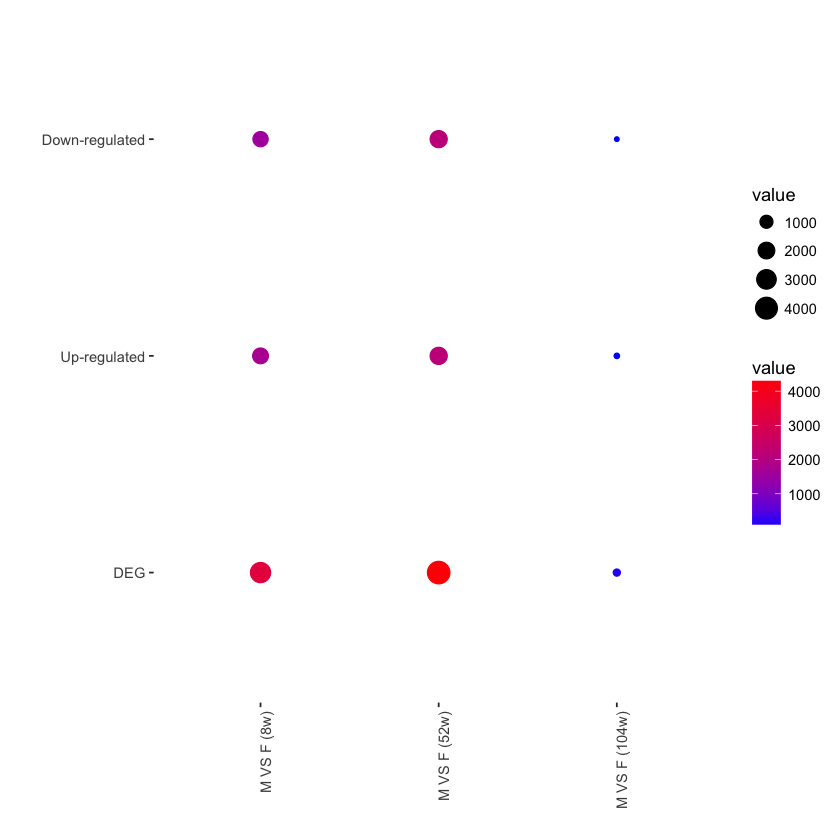

In [9]:
plot_stat_mat(gender_age_stats)

# Differentially expressed genes

In [10]:
gender_age_data = list(M_F_8w, M_F_52w, M_F_104w)
names(gender_age_data) = to_comp
gender_age_deg = extract_diff_expr_genes(gender_age_data, "gender-effect/gender_age/")

Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in grep(txdbPattern, installedPackages):
“argument 'pattern' has length > 1 and only the first element will be used”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(l$deg), "mm10", "geneSymbol", fetch.cats = "KEGG")):
“non-vector elements will be ignored”

# Comparison of the numbers per ages

Differentially expressed genes

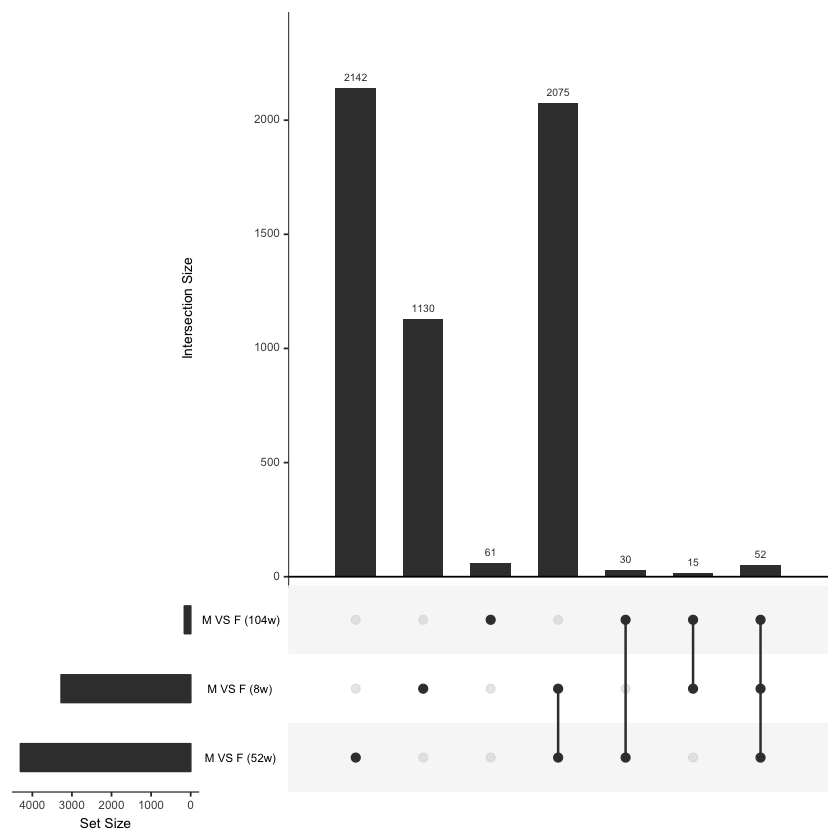

In [11]:
# Differentially expressed genes
upset(as.data.frame(gender_age_deg$deg))

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

M VS F: 8w, 52w, 104w


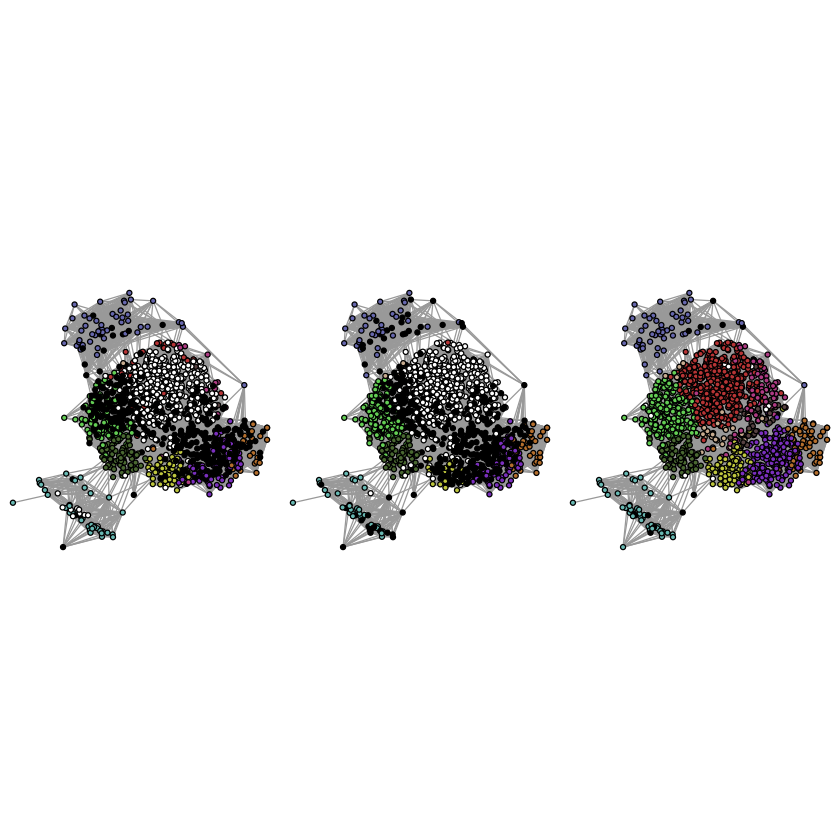

In [12]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
col_M_VS_F_8w = get_deg_colors(gender_age_deg, "M VS F (8w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_VS_F_8w, pal2, layout, add_legend = FALSE)
col_M_VS_F_52w = get_deg_colors(gender_age_deg, "M VS F (52w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_VS_F_52w, pal2, layout, add_legend = FALSE)
col_M_VS_F_104w = get_deg_colors(gender_age_deg, "M VS F (104w)", connected_gene_colors, module_nb)
plot_net_with_layout(net, col_M_VS_F_104w, pal2, layout, add_legend = FALSE)

# GO analysis

In [13]:
full_go_desc = gender_age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = gender_age_deg$GO_wall[[1]][,"category"]
comp = colnames(gender_age_deg$over_represented_GO)
comp = comp[4:length(comp)]

## Biological process

Dot-plot with the most over-represented BP GO (20 most significant p-values for the different comparison)

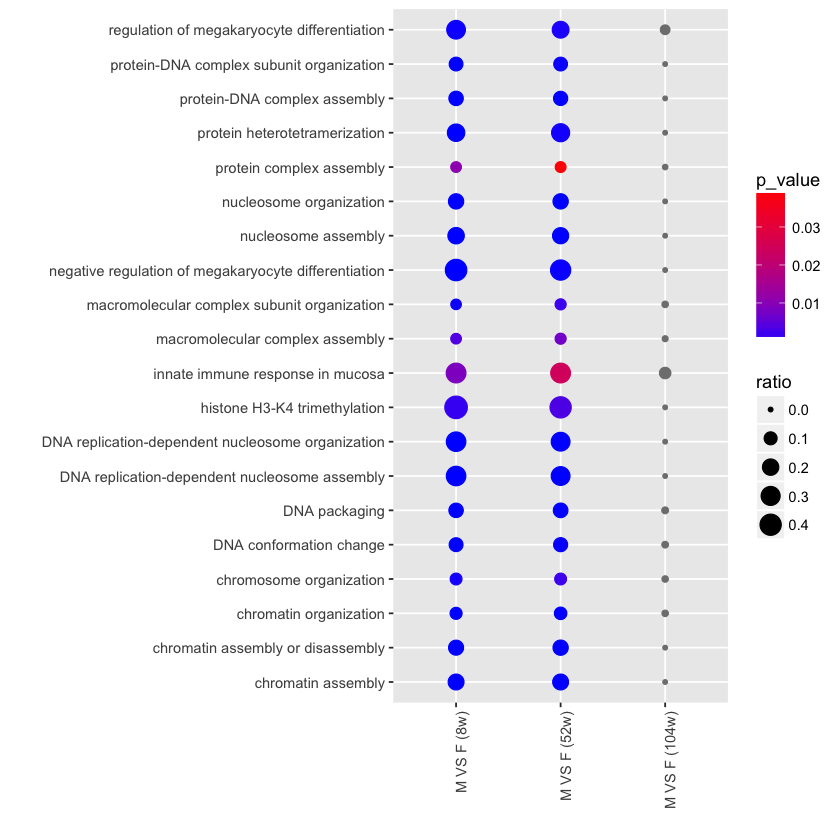

In [14]:
plot_top_go(gender_age_deg$over_represented_GO,
            gender_age_deg$GO_wall,
            "BP",
            comp,
            20)

Network based on description similarity

In [15]:
BP_network = create_GO_network(gender_age_deg, "BP", BP_GO)

GF vs SPF: 8w, 52w, 104w

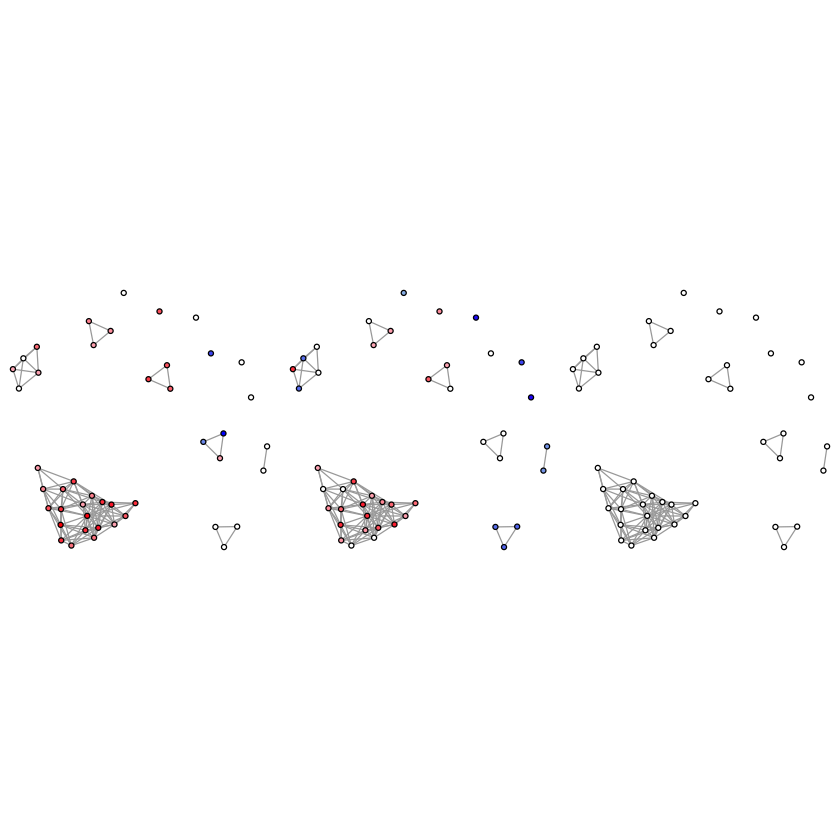

In [16]:
par(mfrow=c(1,3),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "M VS F (8w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (52w)", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "M VS F (104w)", full_go_desc, plot_interactive = FALSE)

M VS F (8w)

In [17]:
# M VS F (8w)
plot_GO_networks(BP_network, to_comp[1], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (52w)

In [18]:
# GF VS SPF (52w)
plot_GO_networks(BP_network, to_comp[2], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

M VS F (104w)

In [19]:
# M VS F (104w)
plot_GO_networks(BP_network, to_comp[3], full_go_desc, plot_non_interactive = F)

HTML widgets cannot be represented in plain text (need html)

## Cellular components

Dot-plot with the most over-represented CC GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 3 rows containing missing values (geom_point).”

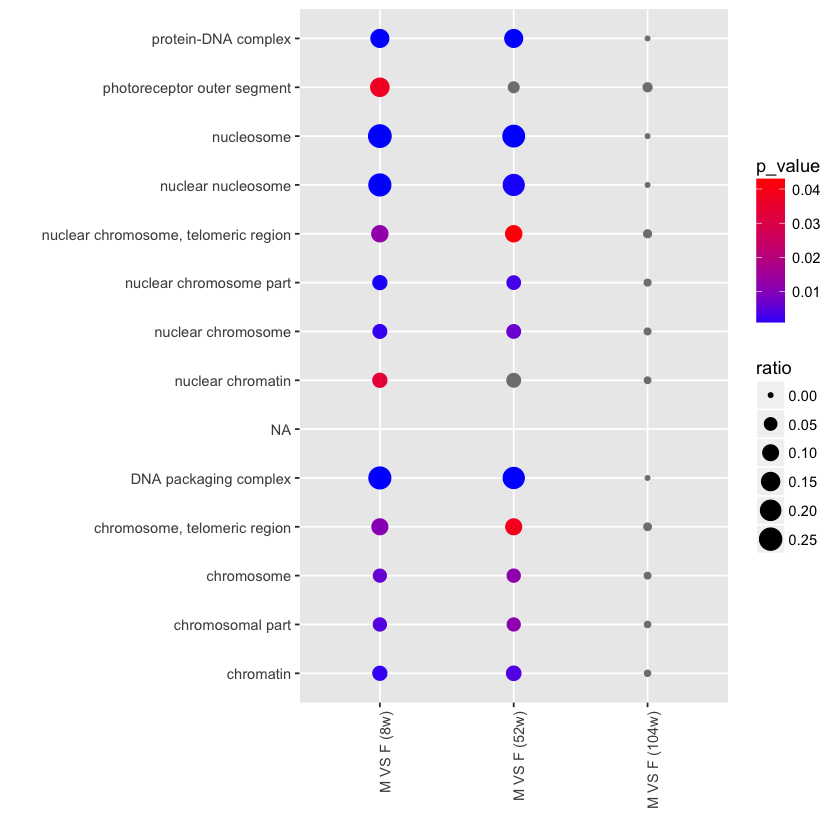

In [20]:
plot_top_go(gender_age_deg$over_represented_GO,
            gender_age_deg$GO_wall,
            "CC",
            comp,
            20)

## Molecular functions

Dot-plot with the most over-represented MF GO (20 most significant p-values for the different comparison)

Warning message:
“Removed 3 rows containing missing values (geom_point).”

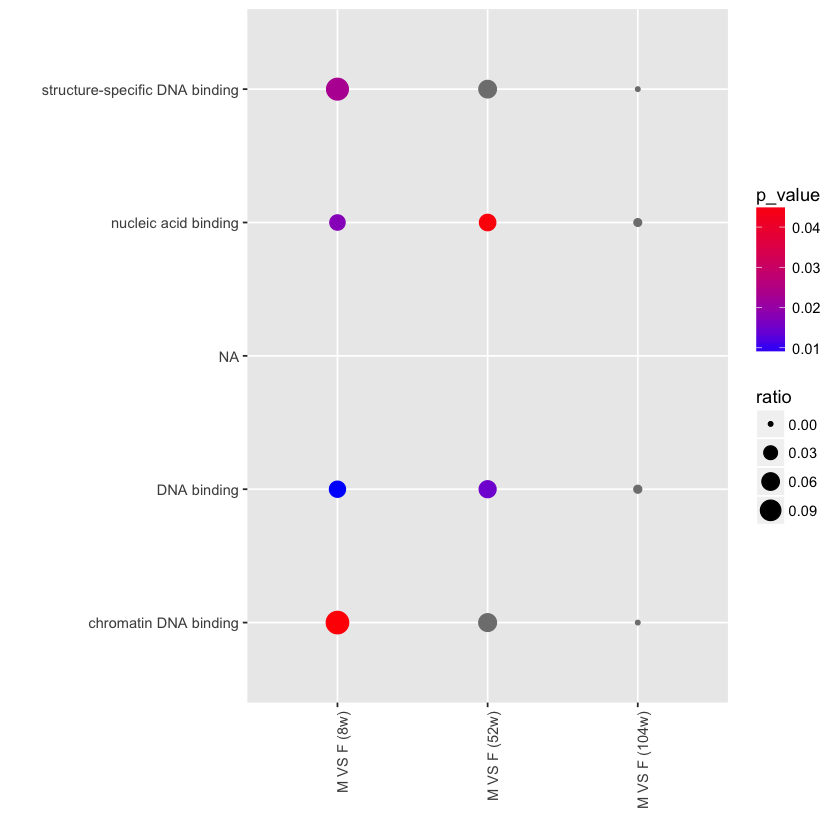

In [21]:
plot_top_go(gender_age_deg$over_represented_GO,
            gender_age_deg$GO_wall,
            "MF",
            comp,
            20)

# KEGG pathways

In [22]:
plot_kegg_pathways(gender_age_deg$over_represented_KEGG[,"category"],
                   gender_age_deg$fc_deg,
                   "../results/dge/gender-effect/gender_age/over_repr_kegg/")

[1] "Note: 61 of 5505 unique input IDs unmapped."


Pathway graphs available at ../results/dge/type-effect/type_age/over_repr_kegg/

In [23]:
plot_kegg_pathways(gender_age_deg$under_represented_KEGG[,"category"],
                   gender_age_deg$fc_deg,
                   "../results/dge/gender-effect/gender_age/under_repr_kegg/")

[1] "Note: 61 of 5505 unique input IDs unmapped."
[1] "Note: 61 of 5505 unique input IDs unmapped."


Pathway graphs available at ../results/dge/type-effect/type_age/under_repr_kegg/